<a href="https://colab.research.google.com/github/mohsen990/Data_Visualization-Top_Hits_Spotify_2000-2019/blob/main/Data_Visualization_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization Project  - Top Hits Spotify from 2000-2019

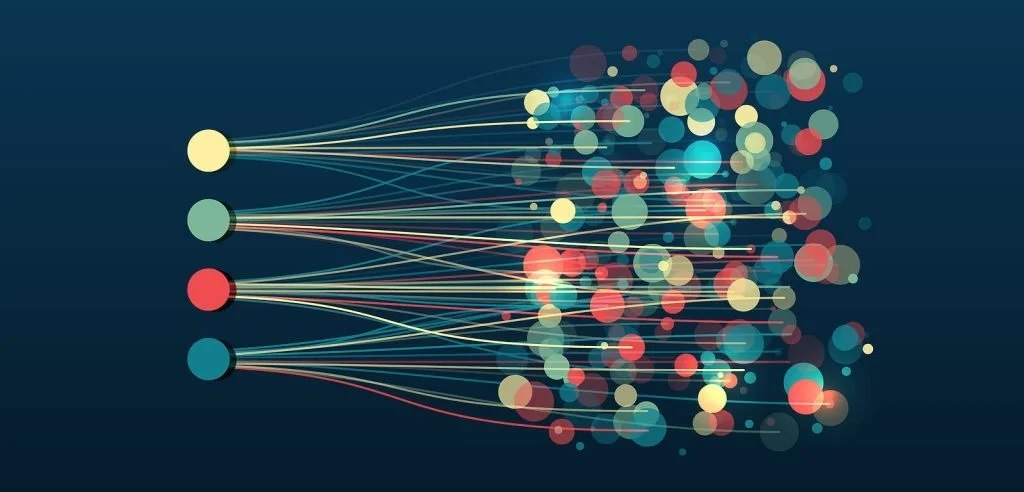

# Introduction

The dataset at hand offers a comprehensive analysis of the top 2000 tracks on Spotify from 2000 to 2019, encompassing various audio statistics and attributes. It includes key information about each track, such as the artist, song name, and release year, as well as specific musical qualities like duration, popularity, and explicit content. Moreover, it provides in-depth audio features like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and tempo. These attributes allow for a detailed examination of the tracks' musical characteristics and their suitability for different contexts, such as dancing or live performance. By analyzing and visualizing this data, we can uncover trends and patterns in music production and consumption over the two-decade span, gaining insights into the evolution of popular music and its various genres.

references :

https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

https://www.kaggle.com/code/varunsaikanuri/spotify-data-visualization

https://www.kaggle.com/code/abdallahwagih/spotify-analysis-and-visualization

https://www.kaggle.com/code/tahaahmedt/spotify-data-analysis-and-visualization



## Installig Kaggle and loading Dataset

In [ ]:
!pip install kaggle

In [ ]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paradisejoy/top-hits-spotify-from-20002019

Dataset URL: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019
License(s): other
  0% 0.00/93.7k [00:00<?, ?B/s]
100% 93.7k/93.7k [00:00<00:00, 43.7MB/s]


In [ ]:
!unzip top-hits-spotify-from-20002019.zip

Archive:  top-hits-spotify-from-20002019.zip
  inflating: songs_normalize.csv     


## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from plotly.offline import iplot
import warnings

warnings.filterwarnings('ignore')

## Load Dataset and show top 10 rows

In [ ]:
#Load Dataset and show top 10 rows
spotify_df = pd.read_csv('/content/songs_normalize.csv')
spotify_df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


## Information about Dataset

In [ ]:
spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


**1- Categorical Data:**

•	artist: Name of the artist.

•	song: Name of the track.

•	explicit: Indicates if the song has explicit content (binary: 0 for non-explicit, 1 for explicit).

•	year: Release year of the track (ordinal).

•	mode: Indicates modality of the track (binary: 0 for minor, 1 for major).

•	key: Musical key of the track (nominal: integers from -1 to 11).

•	genre: Genre of the track (nominal).

**2- Numerical Data:**

•	duration_ms: Duration of the track in milliseconds (continuous).

•	popularity: Popularity score of the track (discrete, ranging from 0 to 100).

•	danceability: Danceability score (continuous, ranging from 0.0 to 1.0).

•	energy: Energy score (continuous, ranging from 0.0 to 1.0).

•	loudness: Average loudness of the track in decibels (continuous, ranging from -60 to 0 dB).

•	speechiness: Speechiness score (continuous, ranging from 0.0 to 1.0).

•	acousticness: Acousticness score (continuous, ranging from 0.0 to 1.0).

•	instrumentalness: Instrumentalness score (continuous, ranging from 0.0 to 1.0).

•	liveness: Liveness score (continuous, ranging from 0.0 to 1.0).

•	valence: Valence score (continuous, ranging from 0.0 to 1.0).

•	tempo: Tempo of the track in beats per minute (continuous).

**Cardinality**
1.	High Cardinality:

o	artist: Thousands of unique artist names.

o	song: Thousands of unique track names.

2.	Moderate Cardinality:

o	year: Limited to the years 2000-2019 (20 unique values).

3.	Low Cardinality:

o	explicit: Two unique values (0, 1).

o	mode: Two unique values (0, 1).

o	key: 13 unique values (-1 to 11)


## checking for duplicate and null values and removing them

In [ ]:
#checking for duplicate values
spotify_df.duplicated().value_counts()
spotify_df.drop_duplicates(inplace=True)

# reomve null values
spotify_df = spotify_df.dropna(how='any',axis=0)

## Pairwise Correlation of Columns

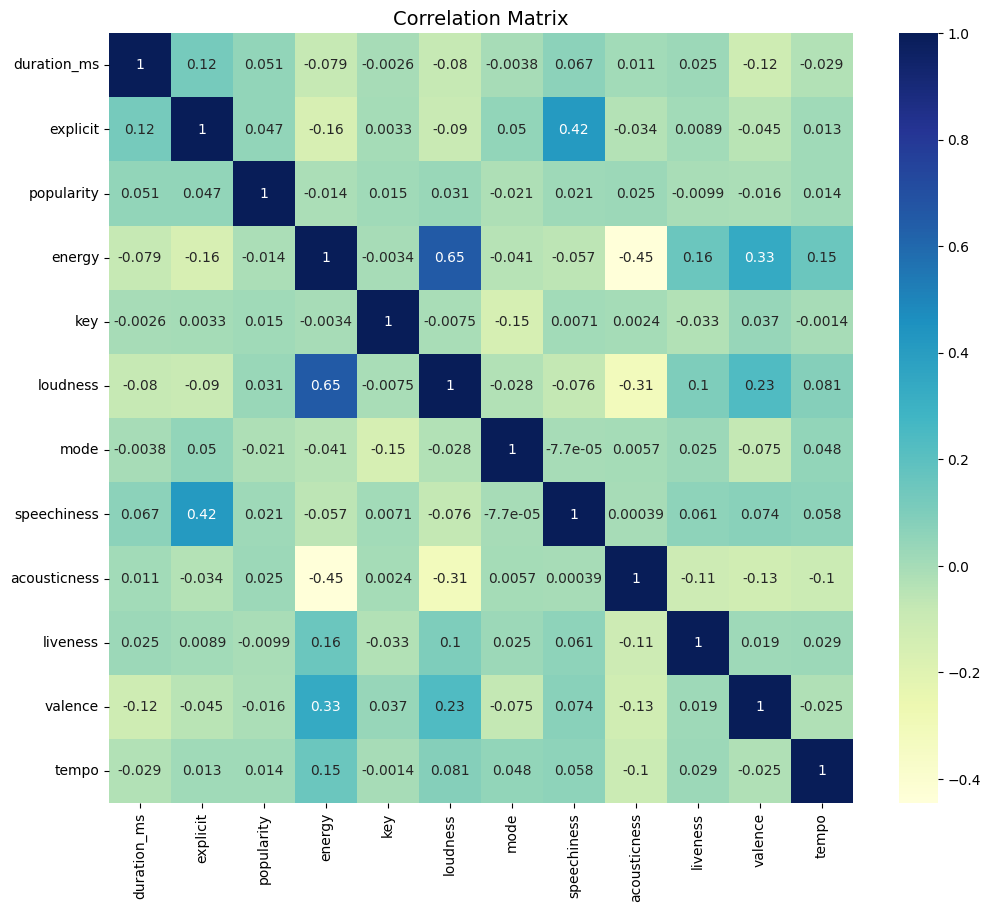

In [ ]:
# use heatmap to show correlation matrix
df_number = spotify_df[['duration_ms','explicit','popularity','energy','key','loudness','mode','speechiness','acousticness','liveness','valence','tempo']]
df_corr = df_number.corr()
heatfig = plt.figure(figsize=(12,10))
sns.heatmap(df_corr , annot=True , cmap="YlGnBu")   #colors:  Blues , coolwarm ,BuPu , Greens ,Oranges , YlOrBr ,Purples
plt.title('Correlation Matrix', fontsize =14)
plt.show()


## Total number of songs per year

In [ ]:
# use bar chart to show number of songs in each year

songs_per_years = spotify_df['year'].value_counts().sort_index()

iplot(px.bar(songs_per_years,
       title='Number of songs per year',
       text_auto=True,
       labels=dict(index='year',value='Songs'),
       color_discrete_sequence=['#1DB954']).update_xaxes(type='category')
     )

## Top 25 Artists with the average popularity of their songs

In [ ]:
#Use sorted table specified by Orange spectrum color to show top 25 Artists with the average popularity of their songs

artists = spotify_df['artist'].value_counts()
artist_df = spotify_df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()

artist_df['total songs'] = artists.values

artist_df.sort_values(by='total songs',ascending=False, inplace=True)

artist_df.reset_index(inplace=True)
artist_df.head(25).style.background_gradient(cmap='Reds', subset=['total songs'])


,artist,popularity,total songs
0,Rihanna,72.260870,23
1,Drake,61.913043,23
2,Eminem,72.333333,21
3,Calvin Harris,67.800000,20
4,Britney Spears,63.052632,19
5,David Guetta,65.833333,18
6,Beyoncé,64.375000,16
7,Kanye West,61.437500,16
8,Taylor Swift,70.312500,16
9,Chris Brown,63.250000,16


## Top 10 artists vs average popularity of their top hits

In [ ]:
#use scatter plot to indicates top 10 artists vs average popularity of their top hits
artist_df = spotify_df[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()

artist_df['total songs'] = artists.values
artist_df.sort_values(by='total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)

iplot(px.scatter(  artist_df[:10],
                   x='artist',
                   y='popularity',
                   size='total songs',
                   size_max=60,
                   color='popularity',  # use the size and color with the column name
                   title='Top 10 artists vs average popularity of their top hits',
                   hover_name='artist'
          ))

## The average duration of songs That changed through the years

In [ ]:
# ues line plot to show how has the average duration of songs changed through the years.
# Function to convert duration in ms into min:sec
def ms_to_minsec(ms):
    sec = ms / 1000
    return f"{int(sec // 60)}:{int(sec % 60)}"

# Skip the years 1998 and 2020
durations = spotify_df[['duration_ms', 'year']].groupby('year').mean().reset_index().iloc[1:-1]
# Convert duration in ms into seconds
durations['duration_s'] = durations['duration_ms'] / 1000
# Apply ms_to_minsec function
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)

# Plot
iplot(px.line(durations,
        x='year',
        y='duration_s',
        title='average song duration over the years',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))

# Distributions

In [ ]:
# use histogram to show distribution of the most important features

fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))

fig.add_trace(go.Histogram(x=spotify_df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=spotify_df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=spotify_df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=spotify_df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=spotify_df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=spotify_df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=spotify_df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=spotify_df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=spotify_df['tempo'],name='tempo'),row=3,col=3)

fig.update_layout(height=900,width=1200,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)   # #presentation , plotly_white,gridon,ygridoff,seaborn


#Distribution of year

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=spotify_df, x='popularity', hue='year', shade=True)
plt.show()

In [ ]:
#use histogram to show total songs based on genres

fig=px.histogram(spotify_df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',
                 color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

## List of Songs Recorded by Each Singer

In [ ]:
#Use bar chart to illustrate the list of Songs Recorded by Each Singer
px.bar(spotify_df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),
       x='artist',y='song',labels={'song':'Total Songs'},
       color_discrete_sequence=['purple'],text='song',title='<b> List of Songs Recorded by Each Singer')

## The proportion of songs having explicit content

In [ ]:
# Use pie chart to show the proportion od songs having explicit content
fig=px.pie(spotify_df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',
           labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

## Counting values of genre column

In [ ]:
#use pie chart to show proportion of genre of all songs

from collections import Counter
import numpy as np
import pandas as pd

def split_genres(genre):
    g = genre.replace(" ", '').split(',')
    g = [t for t in g if t != 'set()']
    return g


genre = spotify_df['genre']
genre_list = []
for song in list(genre):
    for genre in split_genres(song):
        genre_list.append(genre)

dict1 = Counter(genre_list)
genre_count = pd.DataFrame(dict1.items(), columns=['genre', 'count'])

fig = px.pie(
            genre_count,
            values = 'count',
            names = 'genre',
            title = 'counting values of genre '
            )

fig.update_layout(height=700, width=900)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Key Distribution

In [ ]:
# in music, the key determines the set of notes and chords that are commonly used in a piece of music.

iplot(px.pie(spotify_df['key'].value_counts().reset_index(),
            names=r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split(),
            values='key',
            color_discrete_sequence = px.colors.qualitative.Set3,
           title='Key Distribution'
          ).update_traces(textinfo='label+percent'))

## Popular genres based on pouplarity

In [ ]:
# Popular genres based on pouplarity
fig=px.histogram(spotify_df.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),x='genre',y='popularity',
                 color_discrete_sequence=['lightgreen'],template='plotly_dark',marginal='box',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

## Popularity based on explicit content

In [ ]:
# Use box chart to show the popularity of explicit songs

px.box(spotify_df,x='explicit',y='popularity',color='explicit',#template='plotly_dark',
       color_discrete_sequence=['cyan','magenta'],title='<b>popularity based on explicit content')

## Tempo Versus Popularity

In [ ]:
px.scatter(spotify_df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Tempo Versus Popularity')

## Speechiness Versus Popularity

In [ ]:
px.scatter(spotify_df,x='speechiness',y='popularity',color='speechiness',
           color_continuous_scale=px.colors.sequential.Plasma,template='plotly_white',title='<b> Speechiness Versus Popularity') #presentation , plotly_white,gridon,ygridoff,seaborn

## Songs duration distribution with density curve

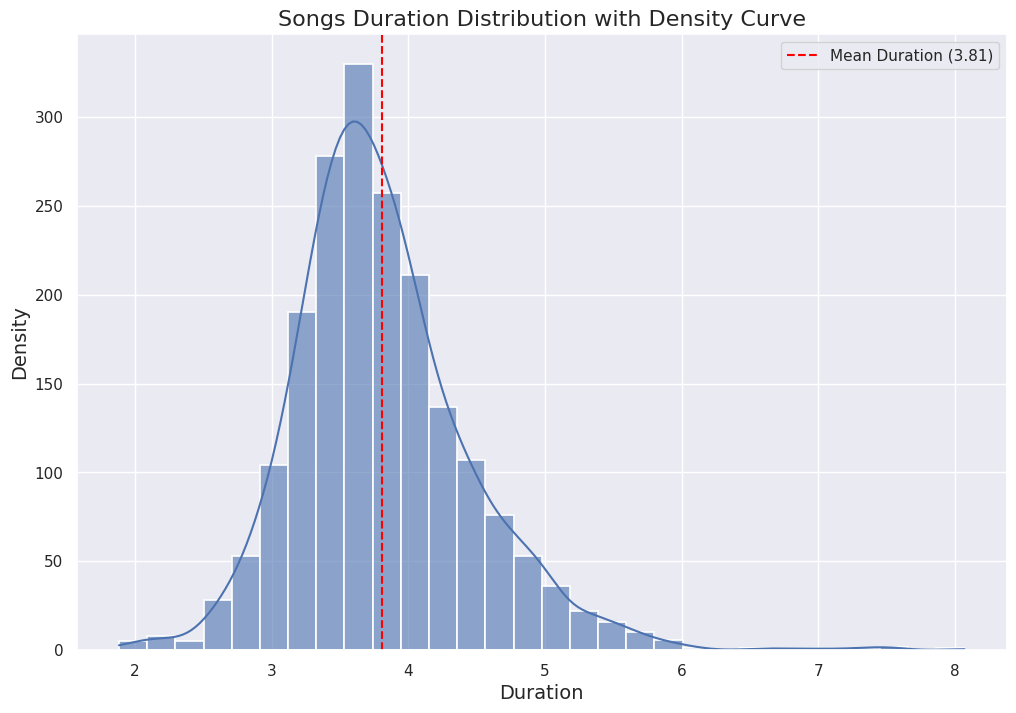

In [ ]:
# use histplot to show the songs Duration Distribution with Density Curve
duration_minutes= spotify_df['duration_ms']/60000
duration_minutes

sns.set_theme()
plt.figure(figsize=(12,8))

sns.histplot(duration_minutes, bins= 30, kde= True, edgecolor= 'white', linewidth= 1.2, alpha =0.6)

plt.title('Songs Duration Distribution with Density Curve', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Density', fontsize=14)

mean_duration = duration_minutes.mean()
plt.axvline(x=mean_duration, color='red', linestyle='--', label=f'Mean Duration ({mean_duration:.2f})')

plt.legend()
plt.show()

## Distribution of mode

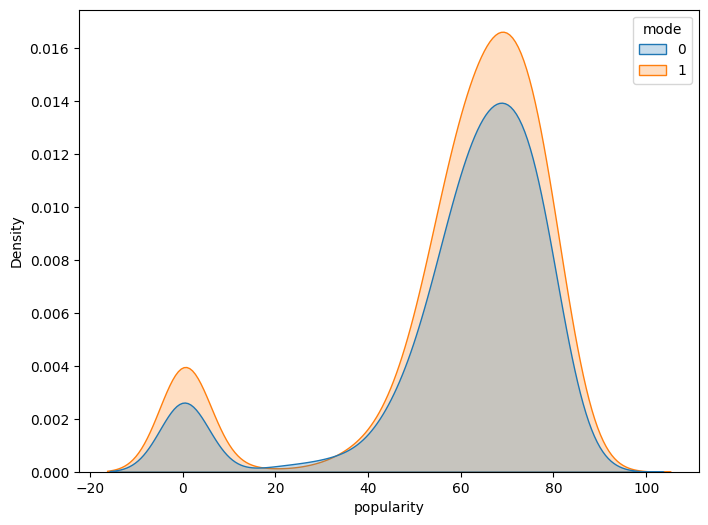

In [ ]:
# Use Kdeplot to show distribution of each type of mode
plt.figure(figsize=(8,6))
sns.kdeplot(data=spotify_df, x='popularity', hue='mode', shade=True)
plt.show()

## Average and Maximum Feature Values

In [ ]:
# Use Radar chart to indicate the average and maximum of some features ('danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness')

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness']
average_values = [spotify_df[feature].mean() for feature in features]

max_values = [spotify_df[feature].max() for feature in features]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=average_values,
      theta=features,
      fill='toself',
      name='Average',
      marker=dict(color='#1DB954')
))

fig.add_trace(go.Scatterpolar(
      r=max_values,
      theta=features,
      mode='markers+lines',
      name='Max',
      marker=dict(color='#FFA500', size=10),
      line=dict(color='#FFA500', width=2)
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    title='Average and Maximum Feature Values',
    template='plotly_white'
)

fig.show()

## TreeMap of Singers Playlist

In [ ]:
# TreeMap of Singers Playlist
fig=px.treemap(spotify_df,path=[px.Constant('Singer'),'artist','genre','song'],values='popularity',title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color='lightgreen')
fig.update_layout(title_x=0.5)